### CNN:
本程序目的是使用TensorFlow 构建一个简单的CNN模型
#### CNN基本结构：
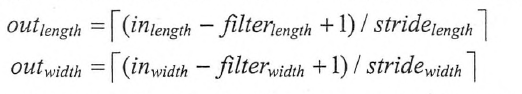
数据->卷积卷积层运算->池化层->全连接层->输出层->预测结果
1. 数据：数据为图片，其中灰度度的通道设置为1 RGB格式的设为3
2. 卷积层：卷积层计算分为补0运算和步补0运算，
<p><span class="mark">2.1. 补0后的维度变化:</span>
    
    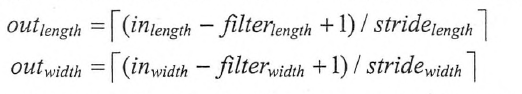
<p><span class="girk">2.2,不补0后的维度变化:</span>
    
    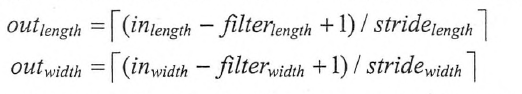
3. 池化层：其基本思想是进一步减少数据维度，基本方式有两种：<1>在一定范围的最大值 <2>取平均值，<span class="burk">其作用可以加快计算速度和防止过拟合</span>
4. 全连接层，本神经网络结构，方便输出。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [29]:
#load data
from sklearn import datasets
digits = datasets.load_digits()
#data = digits['images']
data = digits['data']
label = digits['target']

In [4]:
label.shape

(1797,)

In [5]:
#----------------定义相关参数------------------#

# 定义输入输出变量
x = tf.placeholder(tf.float32,[None,8*8])
y = tf.placeholder(tf.float32,[None,10])

# 定义第一层卷积参数：卷积深度以及卷积核的尺寸
W1 = tf.Variable(tf.random_normal([3,3,1,64]))
b1 = tf.Variable(tf.random_normal([64]))

# 定义第二层卷积参数
W2 = tf.Variable(tf.random_normal([3,3,64,64]))
b2 = tf.Variable(tf.random_normal([64]))

# 全连接层
W3 = tf.Variable(tf.random_normal([2*2*64,1024]))
b3 = tf.Variable(tf.random_normal([1024]))

# 输出层
W_out = tf.Variable(tf.random_normal([1024,10]))
b_out = tf.Variable(tf.random_normal([10]))


In [6]:
def conv_layer(x,w,b):
    conv = tf.nn.conv2d(x, w , strides = [1,1,1,1], padding = 'SAME')
    conv_with_b = tf.nn.bias_add(conv,b)
    conv_out = tf.nn.relu(conv_with_b)
    return conv_out
def maxpool_layer(conv,k=2):
    return tf.nn.max_pool(conv,ksize = [1,k,k,1],strides = [1,k,k,1],padding = 'SAME')

In [7]:
def model():
    x_reshape = tf.reshape(x,shape = [-1,8,8,1])
    conv_out1 = conv_layer(x_reshape,W1,b1)
    maxpool_out1 = maxpool_layer(conv_out1)
    #局部响应归一化函数（其原理是仿造生物学上的神经元对邻神经元的抑制现象（侧抑制））
    norm1 = tf.nn.lrn(maxpool_out1,4,bias = 1.0,alpha = 0.001/9.0, beta = 0.75)
    
    conv_out2 = conv_layer(norm1,W2,b2)
    norm2 = tf.nn.lrn(conv_out2,4,bias = 1.0,alpha = 0.001/9.0, beta = 0.75)
    maxpool_out2 = maxpool_layer(norm2)
    
    maxpool_reshape = tf.reshape(maxpool_out2,[-1,W3.get_shape().as_list()[0]]) 
    local = tf.add(tf.matmul(maxpool_reshape,W3),b3)
    local_out = tf.nn.relu(local)
    
    out = tf.add(tf.matmul(local_out,W_out),b_out)
    
    return out
    

In [22]:
model_op = model()

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits = model_op,labels = y)
)

train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
correct_pred = tf.equal(tf.arg_max(model_op,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [28]:
# Train 
with tf.compat.v1.Session() as sess:
    sess.run(tf.global_variables_initializer())
    onehot_labels = tf.one_hot(label,10,on_value = 1.,off_value = 0.,axis = -1)
    onehot_vals = sess.run(onehot_labels)
    batch_size = label.shape[0] // 20
    print('batch_size = ',batch_size)
    iter_ = 0
    for j in range(30):
        print('EPOCH = ', j)
        for i in range(0,label.shape[0], batch_size):
            batch_data = data[i:i+batch_size,:]
            batch_onehot_vals = onehot_vals[i:i+batch_size,:]
            _,accuracy_val = sess.run([train_op,accuracy], feed_dict = {x:batch_data,y:batch_onehot_vals})
            iter_ += 1
            if iter_ % 10 == 0:
                print(i,accuracy_val)   
        print('Done WITH EPOCH')
            
        #print(i,accuracy_val) 

batch_size =  89
EPOCH =  0
801 0.2247191
1691 0.20224719
Done WITH EPOCH
EPOCH =  1
712 0.2247191
1602 0.39325842
Done WITH EPOCH
EPOCH =  2
623 0.3483146
1513 0.5505618
Done WITH EPOCH
EPOCH =  3
534 0.47191012
1424 0.752809
Done WITH EPOCH
EPOCH =  4
445 0.5280899
1335 0.6966292
Done WITH EPOCH
EPOCH =  5
356 0.7078652
1246 0.7303371
Done WITH EPOCH
EPOCH =  6
267 0.78651685
1157 0.80898875
Done WITH EPOCH
EPOCH =  7
178 0.78651685
1068 0.85393256
Done WITH EPOCH
EPOCH =  8
89 0.8426966
979 0.8764045
Done WITH EPOCH
EPOCH =  9
0 0.8876405
890 0.8764045
1780 0.88235295
Done WITH EPOCH
EPOCH =  10
801 0.8988764
1691 0.92134833
Done WITH EPOCH
EPOCH =  11
712 0.8202247
1602 0.7977528
Done WITH EPOCH
EPOCH =  12
623 0.8426966
1513 0.78651685
Done WITH EPOCH
EPOCH =  13
534 0.8202247
1424 0.94382024
Done WITH EPOCH
EPOCH =  14
445 0.8764045
1335 0.94382024
Done WITH EPOCH
EPOCH =  15
356 0.8426966
1246 0.92134833
Done WITH EPOCH
EPOCH =  16
267 0.94382024
1157 0.9325843
Done WITH EPOCH
E

#### Epoch 和 batch_size说明：
Epoch:训练的次数
<p>batch_size ：在一次训练中分为多组训练，一个组的数量：batch_size

#### 相关函数说明：
<p>tf.nn.conv2d(input,filter,strides,padding,use_cudnn_on_gpu)
 <p> <span class="burk">input :</span> 输入的要做卷积的图片，要求为一个张量，shape为 [ batch, in_height, in_weight, in_channel ]，其中batch为图片的数量，in_height 为图片高度，in_weight 为图片宽度，in_channel 为图片的通道数，灰度图该值为1，彩色图为3。（也可以用其它值，但是具体含义不是很理解）
<p> <span class="burk">filter：</span> 卷积核，要求也是一个张量，shape为 [ filter_height, filter_weight, in_channel, out_channels ]，其中 filter_height 为卷积核高度，filter_weight 为卷积核宽度，in_channel 是图像通道数 ，和 input 的 in_channel 要保持一致，out_channel 是卷积核数量。
<p> <span class="burk">strides：</span> 卷积时在图像每一维的步长，这是一个一维的向量，[ 1, strides, strides, 1]，第一位和最后一位固定必须是1
<p> <span class="burk">padding：</span> string类型，值为“SAME” 和 “VALID”，表示的是卷积的形式，是否考虑边界。"SAME"是考虑边界，不足的时候用0去填充周围，"VALID"则不考虑
<p> <span class="burk">use_cudnn_on_gpu：</span> bool类型，是否使用cudnn加速，默认为true

<p> tf.nn.max_pool:其API与卷积层基本一致，含义为取最大值，tf.nn.avg_pool:取平均值